In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

import functools

import math

import matplotlib.pyplot as plt

In [52]:
inputFile = "ID_data_mass_18122012_prepared.csv"

dataFrame = pd.read_csv(inputFile, header = 0, sep = ';')
print(dataFrame.shape)
data = dataFrame.values[0:10,0:3]
print(data)

numSamples = dataFrame.shape[0]
print("Num samples == " + str(numSamples))
numFeatures = dataFrame.shape[1] - 2  #Last to features used as class designation
print("Num features == " + str(numFeatures))

(185, 33)
[[804 '05.06.08' '3576.30']
 [804 '06.06.08' '3576.30']
 [804 '07.06.08' '3576.30']
 [804 '08.06.08' '3576.30']
 [804 '09.06.08' '3576.30']
 [804 '17.06.11' '3576.30']
 [807 '16.09.04' '3590.00']
 [807 '16.09.04' '3590.00']
 [807 '17.09.04' '3590.00']
 [807 '17.09.04' '3590.00']]
Num samples == 185
Num features == 33


In [70]:
kgfColumnId = dataFrame.shape[1] - 1
gtotalColumnId = dataFrame.shape[1] - 2

listOfClassKeys = [str(line[kgfColumnId]) + '/' + str(line[gtotalColumnId]) for line in dataFrame.values]

keyFrequencies = Counter(listOfKeys).values()
# print(keyFrequencies)

uniqueKeys = Counter(listOfKeys).keys()
# print(uniqueKeys)

probabilities = [keyFrequency / numSamples for keyFrequency in keyFrequencies]
# print(probabilities)

entropy = functools.reduce(lambda accum, element : accum + (-element * math.log2(element)), 
                           probabilities)
print("Entropy == " + str(entropy))

Entropy == 4.010008655543741


In [138]:
featureEntropies = [0] * numFeatures
featureInformationGain = [0] * numFeatures
featureIntrinsicValue = [0] * numFeatures
featureIGRatio = [0] * numFeatures

for featureId in range(numFeatures):
    listOfFeatureValues = dataFrame.values[:, featureId]
    
    uniqueFeatureValues = Counter(listOfFeatureValues).keys()
    frequencies = Counter(listOfFeatureValues).values()
#     print(uniqueFeatureValues)
#     print(frequencies)
    
    valueWeights = dict(zip(uniqueFeatureValues,
                            [valueFrequency / numSamples for valueFrequency in frequencies]))
    
    valueFrequenciesTotal = dict(zip(uniqueFeatureValues,
                                frequencies))
    
    a = dict(zip(uniqueFeatureValues, 
                 [dict()] * len(uniqueFeatureValues)))
    
    for key in a:
        a[key] = dict(zip(uniqueKeys, [0] * len(uniqueKeys)))
    
#     print(a[list(uniqueFeatureValues)[0]])
#     print("==========================================================")
    
    for sampleId in range(numSamples):
        a[listOfFeatureValues[sampleId]][listOfClassKeys[sampleId]] += 1
#         print(listOfFeatureValues[sampleId], "<<<>>>", listOfClassKeys[sampleId])
#         print(a[listOfFeatureValues[sampleId]])
#         print("==========================================================")
        
#     print(list(uniqueFeatureValues)[0])
#     print(a[list(uniqueFeatureValues)[0]])
        
    featureEntropy = 0
    
    for currentFeatureValue in uniqueFeatureValues:
        featureValueEntropy = 0
#         print(currentFeatureValue)
#         print(a[currentFeatureValue].items())

        for key, valueFrequencyInClass in a[currentFeatureValue].items():
            featureValueAndClassKeyPairProbability = valueFrequencyInClass / valueFrequenciesTotal[currentFeatureValue]
            
#             print(featureValueAndClassKeyPairProbability)
            
            if (0 == featureValueAndClassKeyPairProbability):
                continue
                
            featureValueEntropy -= featureValueAndClassKeyPairProbability * math.log2(featureValueAndClassKeyPairProbability)
            
        featureEntropy += featureValueEntropy * valueWeights[currentFeatureValue]
        
    featureEntropies[featureId] = featureEntropy
#     print("Feature's #{0} entropy == {1}".format(featureId, featureEntropy))
            
    featureInformationGain[featureId] = entropy - featureEntropy
#     print("Feature's #{0} IG == {1}".format(featureId, featureInformationGain[featureId]))
    
    featureIntrinsicValue[featureId] = functools.reduce(lambda accum, element : accum + (-element * math.log2(element)), 
                                                        valueWeights.values())
#     print("Feature's #{0} IV == {1}".format(featureId, featureIntrinsicValue[featureId]))

    featureIGRatio[featureId] = featureInformationGain[featureId] / featureIntrinsicValue[featureId]
    print("Feature's #{0} IGR == {1}".format(featureId, featureIGRatio[featureId]))

Feature's #0 IGR == 0.552230800531862
Feature's #1 IGR == 0.5353555730085765
Feature's #2 IGR == 0.5600726089429029
Feature's #3 IGR == 0.4666748779816262
Feature's #4 IGR == 0.5309004895297118
Feature's #5 IGR == 0.5329268227049818
Feature's #6 IGR == 0.5338965434934047
Feature's #7 IGR == 0.5152046955100573
Feature's #8 IGR == 0.5332154911177205
Feature's #9 IGR == 0.5313289329463614
Feature's #10 IGR == 0.49470566098703117
Feature's #11 IGR == 0.4943229836542678
Feature's #12 IGR == 0.525023736525547
Feature's #13 IGR == 0.5323431348016554
Feature's #14 IGR == 0.5349476557191343
Feature's #15 IGR == 0.5336998670904355
Feature's #16 IGR == 0.513920695091424
Feature's #17 IGR == 0.5349476557191343
Feature's #18 IGR == 0.5358237482360599
Feature's #19 IGR == 0.5295194549478894
Feature's #20 IGR == 0.48567373506543204
Feature's #21 IGR == 0.5480538957935434
Feature's #22 IGR == 0.5456531230007851
Feature's #23 IGR == 0.5476087644156982
Feature's #24 IGR == 0.5197613332365418
Feature's #

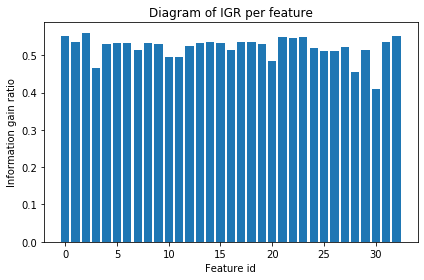

In [153]:
fig, ax = plt.subplots()
ax.bar(range(numFeatures), featureIGRatio)

ax.set_xlabel('Feature id')
ax.set_ylabel('Information gain ratio')
ax.set_title('Diagram of IGR per feature')

fig.tight_layout()
plt.show()